In [1]:
# Importing all the project pre-rquisites
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import keras
import matplotlib as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [2]:
# Importing dataset using short_name as df2

df2=pd.read_csv("E:/Data/use data/csv/London_underground_average_monthly_temperatures.csv")

In [3]:
df2.head()

,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Sub-surface_lines
0,21.7,21.0,16.4,19.5,19.3,18.4,16.4,11.9
1,21.5,21.0,17.9,19.8,19.0,18.3,17.1,11.3
2,21.7,20.9,18.2,20.0,18.7,17.7,16.7,11.4
3,23.4,22.8,20.3,21.4,20.3,19.6,18.4,15.3
4,25.4,24.7,21.9,22.9,22.4,21.5,20.3,18.3


In [4]:
#Checking null values

total_null = df2.isnull().sum()
print("The total number of null values are: " + str(total_null))

The total number of null values are: Bakerloo             0
Central              0
Jubilee              0
Northern             0
Piccadilly           0
Victoria             0
Waterloo_and_City    0
Sub-surface_lines    0
dtype: int64


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bakerloo           96 non-null     float64
 1   Central            96 non-null     float64
 2   Jubilee            96 non-null     float64
 3   Northern           96 non-null     float64
 4   Piccadilly         96 non-null     float64
 5   Victoria           96 non-null     float64
 6   Waterloo_and_City  96 non-null     float64
 7   Sub-surface_lines  96 non-null     float64
dtypes: float64(8)
memory usage: 6.1 KB


,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Sub-surface_lines
Bakerloo,1.000000,0.973739,0.937706,0.975710,0.964745,0.895368,0.845466,0.931754
Central,0.973739,1.000000,0.962590,0.954300,0.987364,0.837296,0.885859,0.973558
Jubilee,0.937706,0.962590,1.000000,0.930159,0.933937,0.793500,0.911652,0.954236
Northern,0.975710,0.954300,0.930159,1.000000,0.927357,0.896142,0.826756,0.899117
Piccadilly,0.964745,0.987364,0.933937,0.927357,1.000000,0.821503,0.860974,0.967900
Victoria,0.895368,0.837296,0.793500,0.896142,0.821503,1.000000,0.667242,0.747156
Waterloo_and_City,0.845466,0.885859,0.911652,0.826756,0.860974,0.667242,1.000000,0.875593
Sub-surface_lines,0.931754,0.973558,0.954236,0.899117,0.967900,0.747156,0.875593,1.000000


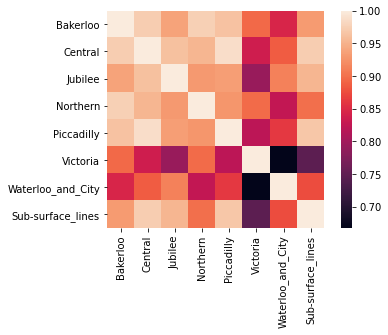

In [6]:
# check correlation of each values

corrmat = df2.corr()
sns.heatmap(corrmat, vmax=1, square=True)
#Correlation

df2.corr(method = "pearson")

<AxesSubplot:title={'center':'London_underground_average_monthly_temp'}>

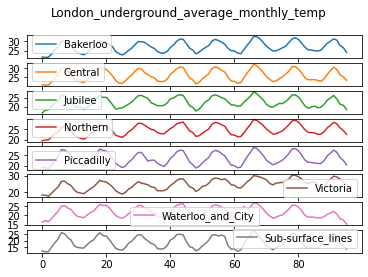

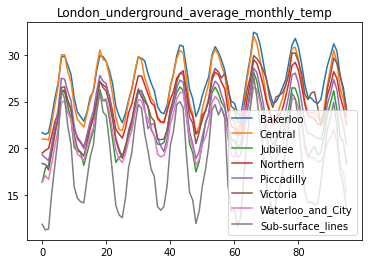

In [7]:
#Visualize the London_underground_average_monthly_temp
df2.plot.line(subplots = True, title='London_underground_average_monthly_temp')
df2.plot(title='London_underground_average_monthly_temp')

In [10]:
#IQR temp. Rate  Central

Q1 = np.percentile(df2['Central'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df2['Central'], 75, interpolation = 'midpoint')

IQR =Q3-Q1
print("IQR for Central Temp.:",IQR)
print("Previous shape:",df2.shape)
#Upper bound
upper = np.where(df2['Central'] >= (Q3+1.5*IQR))
#Lower Bound
lower = np.where(df2['Central'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)

print("New Shape:", df2.shape)

IQR for Central Temp.: 5.25
Previous shape: (96, 8)
New Shape: (96, 8)


In [12]:
#IQR Temp. rate London Bakerloo

Q1 = np.percentile(df2['Bakerloo'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df2['Bakerloo'], 75, interpolation = 'midpoint')

IQR =Q3-Q1
print("IQR for Bakerloo Temp. :",IQR)
print("Previous shape:",df2.shape)
#Upper bound
upper = np.where(df2['Bakerloo'] >= (Q3+1.5*IQR))
#Lower Bound
lower = np.where(df2['Bakerloo'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)

print("New Shape:", df2.shape)

IQR for Bakerloo Temp. : 4.419999999999998
Previous shape: (96, 8)
New Shape: (96, 8)


In [14]:
#IQR temp. rate Jubilee

Q1 = np.percentile(df2['Jubilee'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df2['Jubilee'], 75, interpolation = 'midpoint')

IQR =Q3-Q1
print("IQR for Jubilee:",IQR)
print("Previous shape:",df2.shape)
#Upper bound
upper = np.where(df2['Jubilee'] >= (Q3+1.5*IQR))
#Lower Bound
lower = np.where(df2['Jubilee'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)

print("New Shape:", df2.shape)

IQR for Jubilee: 4.52
Previous shape: (96, 8)
New Shape: (96, 8)


In [15]:
#Normalize data

from sklearn import preprocessing 
import numpy as np

a = np.random.random((1,4))
a = a*20
print("Data = ", a)

#Normalize the data attributes
normalized = preprocessing.normalize(a)
print("Normalized Data =", normalized)

Data =  [[13.97956404 18.04263931  2.03249033 14.4921257 ]]
Normalized Data = [[0.51560268 0.66545947 0.07496353 0.53450729]]


<BarContainer object of 96 artists>

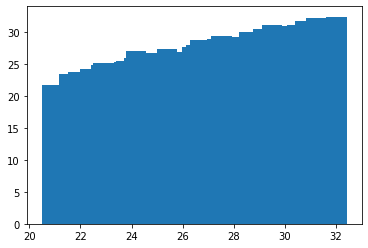

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

#visualise Temp. rate by months

plt.bar(df2['Central'],df2['Bakerloo'])

<BarContainer object of 96 artists>

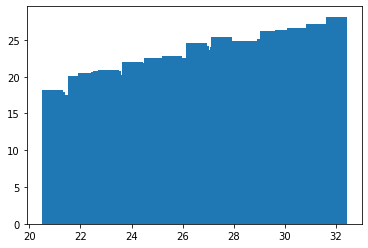

In [17]:
#visualise Temp. rate by months

plt.bar(df2['Central'],df2['Jubilee'])